# Project: Wrangling and Analyzing Data(Twitter WeRateDogs)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Assessing the Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>   
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

> WeRateDogs is a Twitter account that rates dogs with a humorous comment about the dog. The files(**Twitter-archive-enhanced, Image-predictions and Tweet-json**) used are support materials from Udacity.

<a id='gather'></a>
## Data Gathering

>There are three pieces of data that need to be gathered for the completion of the project and they are all in different format which will need different methods to gather them.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import requests
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

1. The WeRateDogs Twitter archive which is in csv format will be downloaded in the notebook using pandas read_csv function.

In [2]:
# read csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


2. Given the url, the Requests library will be used to download the image-predictions.tsv

In [4]:
#url from Udacity
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [5]:
#using requests
response = requests.get(url)

with open('twitter_image.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
# read file
twitter_image = pd.read_csv('twitter_image.tsv', sep='\t') # tab seaparated

In [7]:
twitter_image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Using the open with statement to download the tweet-json.txt that was provided as a supported. Though if access is granted by Twitter to access API the Tweepy library will be used.

In [8]:
# Making item a python library
tweet = []

with open('tweet-json.txt', 'r') as file:
    for tweets in file:
        data = json.loads(tweets)
        tweet.append(data)

In [9]:
# Specifying the columns needed in  DataFrame
tweet_df = pd.DataFrame(tweet, columns = ['id', 'retweet_count', 'favorite_count'])

In [10]:
tweet_df.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


Now that all the required data has been gathered I will go ahead and assess the data.

<a id='assess'></a>
## Assessing the Data
>The pieces of data gathered will be assessed for quality and tidiness before merging and cleaning. Assessing data can be done programmatically or visually.

Visually assessing the data by scrolling through and viewing smaples of how the data is structured.This can also be done using Excel spreadsheet.

In [11]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
twitter_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
tweet_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


Programmatically assessing the data using codes

In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
twitter_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [17]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
twitter_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
tweet_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [20]:
twitter_archive.duplicated().sum(), twitter_image.duplicated().sum(), tweet_df.duplicated().sum()

(0, 0, 0)

In [21]:
# Null values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Vixen        1
Rontu        1
Stella       1
Duddles      1
Henry        1
Name: name, Length: 957, dtype: int64

In [23]:
twitter_archive.query('name == "Emmy"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None


In [24]:
twitter_archive.groupby('retweeted_status_id').first()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
retweeted_status_id,,,,,,,,,,,,,,,,
6.661041e+17,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
6.671383e+17,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
6.671522e+17,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
6.671828e+17,798585098161549313,NaN,NaN,2016-11-15 17:54:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Timison. He just told a...,4.196984e+09,2015-11-19 03:29:07 +0000,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
6.675094e+17,798628517273620480,NaN,NaN,2016-11-15 20:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This a Norwegian Pewterschmidt ...,4.196984e+09,2015-11-20 01:06:48 +0000,https://twitter.com/dog_rates/status/667509364...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.768508e+17,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
8.780576e+17,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
8.782815e+17,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [25]:
twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
841,766864461642756096,NaN,NaN,2016-08-20 05:08:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs... this is a ...,7.599238e+17,4.196984e+09,2016-08-01 01:28:46 +0000,https://twitter.com/dog_rates/status/759923798...,10,10,None,None,None,None,None
681,788765914992902144,NaN,NaN,2016-10-19 15:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Butter. She can have whatever she want...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788765914...,12,10,Butter,None,None,None,None
427,821153421864615936,8.211526e+17,113211856.0,2017-01-17 00:33:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@imgur for a polar bear tho I'd say 13/10 is a...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


In [26]:
# Checking for common header names
all_columns = pd.Series(list(twitter_archive) + list(twitter_image) + list(tweet_df))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

### Quality Issues
 `twitter_archive` table: 
* in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and expanded_urls have null values (NaN)
* timestamp should not be an object data type, it should be datetime
* the columns doggo, floofer, pupper and puppo should be values not column names
* source column should show the exact source of tweet instead of the url
* tweet_id, retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id in float should be a string datatype
* duplicated rating because of retweets

 `twitter_image` table: 
* p1, p2, p3 sometimes in uppercase and names separated by underscore(_)
* twitter id should be a string not an int
* duplicated values in jpg_url column

 `tweet_df` table:
* column name id should be tweet_id as in `twitter_archive` and `twitter_image` table for easy merge

### Tidiness Issues
* the `twitter_image` table have tweets that are not dogs
* timestamp column should be split into date and time columns
* the three tables should be merged to one
* using neural network classified with more than one type of breed 

<a id='clean'></a>
## Cleaning Data

> Before cleaning, it is good practice to make copies of the original data

In [27]:
# Making copies
twitter_archive_clean = twitter_archive.copy()
twitter_image_clean = twitter_image.copy()
tweet_df_clean = tweet_df.copy()

### **`TWITTER_ARCHIVE_CLEAN`**

**1) Define**
> Drop columns that are not very necessary for analysis, drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id columns, retweeted_status_timestamp, expanded_urls

**Code**

In [28]:
# Creating drop function
def drop_col(df, col_name, axis):
    result = df.drop(col_name, axis, inplace=True)
    return result

In [29]:
# Applying funtion
drop_col(twitter_archive_clean, 'in_reply_to_status_id', 1)
drop_col(twitter_archive_clean, 'in_reply_to_user_id', 1)
drop_col(twitter_archive_clean, 'retweeted_status_user_id', 1)
drop_col(twitter_archive_clean, 'expanded_urls', 1)

**Test**

In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_timestamp  181 non-null    object 
 6   rating_numerator            2356 non-null   int64  
 7   rating_denominator          2356 non-null   int64  
 8   name                        2356 non-null   object 
 9   doggo                       2356 non-null   object 
 10  floofer                     2356 non-null   object 
 11  pupper                      2356 non-null   object 
 12  puppo                       2356 non-null   object 
dtypes: float64(1), int64(3), object(9

In [31]:
twitter_archive_clean.isna().sum()

tweet_id                         0
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_timestamp    2175
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

**2) Define**
> Use pandas fillna to fill columns with missing values

**Code**

In [32]:
twitter_archive_clean = twitter_archive_clean.fillna('Not Available')

**Test**

In [33]:
twitter_archive_clean.isna().sum()

tweet_id                      0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_timestamp    0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [34]:
twitter_archive_clean

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Not Available,Not Available,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Not Available,Not Available,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Not Available,Not Available,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Not Available,Not Available,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Not Available,Not Available,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,Not Available,Not Available,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,Not Available,Not Available,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,Not Available,Not Available,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,Not Available,Not Available,7,10,a,None,None,None,None


**3) Define**
> Change datatype of tweet_id and retweeted_status_id

**Code**

In [35]:
# Creating function for datatype conversion
def datatype_converter(df, col_name, datatype):
    df[col_name] = df[col_name].astype(datatype)
    return (df[col_name])

In [36]:
# Convert
datatype_converter(twitter_archive_clean, 'tweet_id', str)
datatype_converter(twitter_archive_clean, 'retweeted_status_id', str)

0       Not Available
1       Not Available
2       Not Available
3       Not Available
4       Not Available
            ...      
2351    Not Available
2352    Not Available
2353    Not Available
2354    Not Available
2355    Not Available
Name: retweeted_status_id, Length: 2356, dtype: object

**Test**

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   object
 1   timestamp                   2356 non-null   object
 2   source                      2356 non-null   object
 3   text                        2356 non-null   object
 4   retweeted_status_id         2356 non-null   object
 5   retweeted_status_timestamp  2356 non-null   object
 6   rating_numerator            2356 non-null   int64 
 7   rating_denominator          2356 non-null   int64 
 8   name                        2356 non-null   object
 9   doggo                       2356 non-null   object
 10  floofer                     2356 non-null   object
 11  pupper                      2356 non-null   object
 12  puppo                       2356 non-null   object
dtypes: int64(2), object(11)
memory usage: 239.4+ KB


**4) Define**
> Split timestamp column into date and time columns

**Code**

In [38]:
# Creating the date and time columns
twitter_archive_clean['date'] = pd.to_datetime(twitter_archive_clean['timestamp']).dt.date
twitter_archive_clean['time'] = pd.to_datetime(twitter_archive_clean['timestamp']).dt.time

In [39]:
# Dropping the timestamp column
drop_col(twitter_archive_clean, 'timestamp', 1)

**Test**

Checking if the columns have been created and the timestamp column dropped and data type changed to datetime

In [40]:
# Checking column names
twitter_archive_clean.columns

Index(['tweet_id', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'date', 'time'],
      dtype='object')

In [41]:
# First 3 rows
twitter_archive_clean.head(1)

,tweet_id,source,text,retweeted_status_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Not Available,Not Available,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56


In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   object
 1   source                      2356 non-null   object
 2   text                        2356 non-null   object
 3   retweeted_status_id         2356 non-null   object
 4   retweeted_status_timestamp  2356 non-null   object
 5   rating_numerator            2356 non-null   int64 
 6   rating_denominator          2356 non-null   int64 
 7   name                        2356 non-null   object
 8   doggo                       2356 non-null   object
 9   floofer                     2356 non-null   object
 10  pupper                      2356 non-null   object
 11  puppo                       2356 non-null   object
 12  date                        2356 non-null   object
 13  time                        2356 non-null   obje

**5) Define**
> Change the date to datetime datatype

**Code**

In [43]:
# Changing to datetime
twitter_archive_clean['date'] = pd.to_datetime(twitter_archive_clean['date'])

**Test**

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   source                      2356 non-null   object        
 2   text                        2356 non-null   object        
 3   retweeted_status_id         2356 non-null   object        
 4   retweeted_status_timestamp  2356 non-null   object        
 5   rating_numerator            2356 non-null   int64         
 6   rating_denominator          2356 non-null   int64         
 7   name                        2356 non-null   object        
 8   doggo                       2356 non-null   object        
 9   floofer                     2356 non-null   object        
 10  pupper                      2356 non-null   object        
 11  puppo                       2356 non-null   object      

In [45]:
twitter_archive_clean.head(1)

,tweet_id,source,text,retweeted_status_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Not Available,Not Available,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56


**6) Define**
> Combine doggo, floofer, pupper and puppo columns

**Code**

In [46]:
# Combine doggo, floofer, pupper snd puppo
twitter_archive_clean['dog_stage'] = twitter_archive_clean[twitter_archive_clean.columns[8:12]].apply(lambda x: ','.join(x.astype(str)),axis=1)

In [47]:
# Drop the columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer', 'pupper', 'puppo'],axis=1)

**Test**

In [48]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   source                      2356 non-null   object        
 2   text                        2356 non-null   object        
 3   retweeted_status_id         2356 non-null   object        
 4   retweeted_status_timestamp  2356 non-null   object        
 5   rating_numerator            2356 non-null   int64         
 6   rating_denominator          2356 non-null   int64         
 7   name                        2356 non-null   object        
 8   date                        2356 non-null   datetime64[ns]
 9   time                        2356 non-null   object        
 10  dog_stage                   2356 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 

In [49]:
twitter_archive_clean.head(2)

,tweet_id,source,text,retweeted_status_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,date,time,dog_stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Not Available,Not Available,13,10,Phineas,2017-08-01,16:23:56,"None,None,None,None"
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Not Available,Not Available,13,10,Tilly,2017-08-01,00:17:27,"None,None,None,None"


**7) Define**
> Pop the dog_stage to get boolean values and join to twitter_archive_clean dataframe

**Code**

In [50]:
# Pop and join
twitter_archive_clean = twitter_archive_clean.join(twitter_archive_clean.pop('dog_stage').str.get_dummies(',').astype(bool))

**Test**

In [51]:
twitter_archive_clean.head(3)

,tweet_id,source,text,retweeted_status_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,date,time,None,doggo,floofer,pupper,puppo
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Not Available,Not Available,13,10,Phineas,2017-08-01,16:23:56,True,False,False,False,False
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Not Available,Not Available,13,10,Tilly,2017-08-01,00:17:27,True,False,False,False,False
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Not Available,Not Available,12,10,Archie,2017-07-31,00:18:03,True,False,False,False,False


In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   source                      2356 non-null   object        
 2   text                        2356 non-null   object        
 3   retweeted_status_id         2356 non-null   object        
 4   retweeted_status_timestamp  2356 non-null   object        
 5   rating_numerator            2356 non-null   int64         
 6   rating_denominator          2356 non-null   int64         
 7   name                        2356 non-null   object        
 8   date                        2356 non-null   datetime64[ns]
 9   time                        2356 non-null   object        
 10  None                        2356 non-null   bool          
 11  doggo                       2356 non-null   bool        

**8) Define**
> Create pattern to match exact source using regex

**Test**

In [53]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

In [54]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [55]:
twitter_archive_clean.head(3)

,tweet_id,source,text,retweeted_status_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,date,time,None,doggo,floofer,pupper,puppo
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Not Available,Not Available,13,10,Phineas,2017-08-01,16:23:56,True,False,False,False,False
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Not Available,Not Available,13,10,Tilly,2017-08-01,00:17:27,True,False,False,False,False
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Not Available,Not Available,12,10,Archie,2017-07-31,00:18:03,True,False,False,False,False


There are dogs which do not have a stage or the user/owner did not not specify which is why there is None. 

**9) Define**
> Find index of retweeted tweets and drop

**Code**

In [56]:
# querying dataframe for retweets only
retweet = twitter_archive_clean.query('retweeted_status_id != "Not Available"')
retweet

,tweet_id,source,text,retweeted_status_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,date,time,None,doggo,floofer,pupper,puppo
19,888202515573088257,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted s...,8.874739571039519e+17,2017-07-19 00:47:34 +0000,13,10,Canela,2017-07-21,01:02:36,True,False,False,False,False
32,886054160059072513,Twitter for iPhone,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537344211026e+17,2017-07-15 02:44:07 +0000,12,10,None,2017-07-15,02:45:48,True,False,False,False,False
36,885311592912609280,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,8.305833205850685e+17,2017-02-12 01:04:29 +0000,13,10,Lilly,2017-07-13,01:35:06,True,False,False,False,False
68,879130579576475649,Twitter for iPhone,RT @dog_rates: This is Emmy. She was adopted t...,8.780576130401157e+17,2017-06-23 01:10:23 +0000,14,10,Emmy,2017-06-26,00:13:58,True,False,False,False,False
73,878404777348136964,Twitter for iPhone,RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815110064783e+17,2017-06-23 16:00:04 +0000,13,10,Shadow,2017-06-24,00:09:53,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,Twitter for iPhone,RT @dog_rates: This is Shaggy. He knows exactl...,6.678667242938778e+17,2015-11-21 00:46:50 +0000,10,10,Shaggy,2016-06-25,01:52:36,True,False,False,False,False
1043,743835915802583040,Twitter for iPhone,RT @dog_rates: Extremely intelligent dog here....,6.671382696715059e+17,2015-11-19 00:32:12 +0000,10,10,None,2016-06-17,16:01:16,True,False,False,False,False
1242,711998809858043904,Twitter for iPhone,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119982797733478e+17,2016-03-21 19:29:52 +0000,12,10,None,2016-03-21,19:31:59,True,False,False,False,False
2259,667550904950915073,Twitter Web Client,RT @dogratingrating: Exceptional talent. Origi...,6.675486956640707e+17,2015-11-20 03:43:06 +0000,12,10,None,2015-11-20,03:51:52,True,False,False,False,False


In [57]:
# Get index of retweets
retweet_index = retweet.index
retweet_index

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [58]:
# Drop index
twitter_archive_clean.drop(retweet_index, inplace=True)

**Test**

In [59]:
retweet = twitter_archive_clean.query('retweeted_status_id != "Not Available"')
retweet

,tweet_id,source,text,retweeted_status_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,date,time,None,doggo,floofer,pupper,puppo


**10) Define**
> Drop retweeted_status_id and retweeted_status_timestamp columns

**Code**

In [60]:
# Drop retweeted_status_id and retweeted_status_timestamp columns
drop_col(twitter_archive_clean, 'retweeted_status_id', 1)
drop_col(twitter_archive_clean, 'retweeted_status_timestamp', 1)

**Test**

In [61]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   source              2175 non-null   object        
 2   text                2175 non-null   object        
 3   rating_numerator    2175 non-null   int64         
 4   rating_denominator  2175 non-null   int64         
 5   name                2175 non-null   object        
 6   date                2175 non-null   datetime64[ns]
 7   time                2175 non-null   object        
 8   None                2175 non-null   bool          
 9   doggo               2175 non-null   bool          
 10  floofer             2175 non-null   bool          
 11  pupper              2175 non-null   bool          
 12  puppo               2175 non-null   bool          
dtypes: bool(5), datetime64[ns](1), int64(2), object(

### **`TWITTER_IMAGE_CLEAN`**

**1) Define**
> Change data type of tweet_id column

**Code**

In [62]:
twitter_image_clean['tweet_id']=twitter_image_clean['tweet_id'].astype(str)

**Test**

In [63]:
twitter_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**2) Define**
> Remove predictions that are not dogs

**Code**

In [64]:
twitter_image_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [65]:
# join the p1_dog, p2_dog and p3_dog in a single column
twitter_image_clean['dog_prediction'] = twitter_image_clean[['p1_dog', 'p2_dog', 'p3_dog']].apply(lambda x: ' '.join(x.astype(str)),axis=1)

In [66]:
twitter_image_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True True True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True True True


In [67]:
twitter_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2075 non-null   object 
 1   jpg_url         2075 non-null   object 
 2   img_num         2075 non-null   int64  
 3   p1              2075 non-null   object 
 4   p1_conf         2075 non-null   float64
 5   p1_dog          2075 non-null   bool   
 6   p2              2075 non-null   object 
 7   p2_conf         2075 non-null   float64
 8   p2_dog          2075 non-null   bool   
 9   p3              2075 non-null   object 
 10  p3_conf         2075 non-null   float64
 11  p3_dog          2075 non-null   bool   
 12  dog_prediction  2075 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(6)
memory usage: 168.3+ KB


In [68]:
# Get predictions that are not dogs
not_dog = twitter_image_clean.query('dog_prediction=="False False False"')
not_dog

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_prediction
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,False False False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False,False False False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False,False False False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False,False False False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False,False False False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False,False False False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False,False False False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False,False False False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,False False False


In [69]:
# get index of not_dog prediction
not_dog_index = not_dog.index

In [70]:
# drop index
twitter_image_clean.drop(not_dog_index, inplace=True)

**Test**

In [71]:
twitter_image_clean.query('dog_prediction=="False False False"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_prediction


> Drop dog_prediction column

In [72]:
drop_col(twitter_image_clean, 'dog_prediction', 1)

In [73]:
twitter_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   object 
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 141.9+ KB


**3) Define**
>Create column for dog_breed with higher/highest confidence level(conf) with dog as true

In [74]:
criteria = [(twitter_image_clean['p1_dog']==True),(twitter_image_clean['p2_dog']==True),(twitter_image_clean['p3_dog']==True)]
breed = [twitter_image_clean.p1, twitter_image_clean.p2, twitter_image_clean.p3]
prediction = [twitter_image_clean.p1_conf, twitter_image_clean.p2_conf,twitter_image_clean.p3_conf]

In [75]:
twitter_image_clean['dog_breed']=np.select(criteria, breed, default='none')
twitter_image_clean['confidence']= np.select(criteria, prediction, default=0)

In [76]:
twitter_image_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


**4) Define**
> Remove underscore _ in dog breeds and replace with whitespace ' ' and dog breed names should start with uppercase

**Code**

In [77]:
twitter_image_clean['dog_breed']=twitter_image_clean['dog_breed'].str.replace('_'," ").str.capitalize()

**Test**

In [78]:
twitter_image_clean.dog_breed.value_counts()

Golden retriever      173
Labrador retriever    113
Pembroke               96
Chihuahua              95
Pug                    65
                     ... 
Scotch terrier          1
Irish wolfhound         1
Standard schnauzer      1
Clumber                 1
Silky terrier           1
Name: dog_breed, Length: 113, dtype: int64

### `TWEET_DF`

**1) Define**
> Rename id to tweet_id

**Code**

In [79]:
tweet_df_clean = tweet_df_clean.rename(columns = {'id':'tweet_id'})

**Test**

In [80]:
tweet_df_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


**2) Define**
> Change tweet_id to string data type

**Code**

In [81]:
datatype_converter(tweet_df_clean, 'tweet_id', str)

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2349    666049248165822465
2350    666044226329800704
2351    666033412701032449
2352    666029285002620928
2353    666020888022790149
Name: tweet_id, Length: 2354, dtype: object

**Test**

In [82]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


**Selecting required column from each table and merge**

In [83]:
#From twitter_archive table 
dog_info = twitter_archive_clean[['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name', 'None', 'doggo', 'floofer', 'pupper','puppo']]
# From twitter_image table
dog_info_2 = twitter_image_clean[['tweet_id', 'jpg_url', 'dog_breed']]

In [84]:
# Merge both dog_info and dog_info_2 with tweet_df
dog_tweet = pd.merge(pd.merge(dog_info,dog_info_2, on ='tweet_id'), tweet_df_clean, on='tweet_id')

In [85]:
dog_tweet.head(2)

,tweet_id,text,rating_numerator,rating_denominator,name,None,doggo,floofer,pupper,puppo,jpg_url,dog_breed,retweet_count,favorite_count
0,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,True,False,False,False,False,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6514,33819
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,True,False,False,False,False,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4328,25461


In [86]:
# Reordering the column using reindex
column_names=['tweet_id', 'name', 'dog_breed', 'jpg_url', 'text', 'None','doggo', 'floofer', 'pupper', 'puppo', 'retweet_count','favorite_count', 'rating_numerator','rating_denominator']
dog_tweet = dog_tweet.reindex(columns=column_names)

In [87]:
dog_tweet.head(60)

,tweet_id,name,dog_breed,jpg_url,text,None,doggo,floofer,pupper,puppo,retweet_count,favorite_count,rating_numerator,rating_denominator
0,892177421306343426,Tilly,Chihuahua,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,This is Tilly. She's just checking pup on you....,True,False,False,False,False,6514,33819,13,10
1,891815181378084864,Archie,Chihuahua,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,This is Archie. He is a rare Norwegian Pouncin...,True,False,False,False,False,4328,25461,12,10
2,891689557279858688,Darla,Labrador retriever,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,This is Darla. She commenced a snooze mid meal...,True,False,False,False,False,8964,42908,13,10
3,891327558926688256,Franklin,Basset,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,This is Franklin. He would like you to stop ca...,True,False,False,False,False,9774,41048,12,10
4,891087950875897856,None,Chesapeake bay retriever,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Here we have a majestic great white breaching ...,True,False,False,False,False,3261,20562,13,10
5,890971913173991426,Jax,Appenzeller,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Meet Jax. He enjoys ice cream so much he gets ...,True,False,False,False,False,2158,12041,13,10
6,890729181411237888,None,Pomeranian,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,When you watch your owner call another dog a g...,True,False,False,False,False,16716,56848,13,10
7,890609185150312448,Zoey,Irish terrier,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,This is Zoey. She doesn't want to be one of th...,True,False,False,False,False,4429,28226,13,10
8,890240255349198849,Cassie,Pembroke,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,This is Cassie. She is a college pup. Studying...,True,True,False,False,False,7711,32467,14,10
9,890006608113172480,Koda,Samoyed,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,This is Koda. He is a South Australian decksha...,True,False,False,False,False,7624,31166,13,10


> The `twitter_image_clean` initially had duplicates of jpg_url but on merging the duplicates were dropped

In [88]:
twitter_image_clean.query('jpg_url=="https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,confidence
1150,732005617171337216,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,1,English_setter,0.677408,True,Border_collie,0.052724,True,cocker_spaniel,0.048572,True,English setter,0.677408
1693,816014286006976512,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,1,English_setter,0.677408,True,Border_collie,0.052724,True,cocker_spaniel,0.048572,True,English setter,0.677408


In [89]:
twitter_image_clean['jpg_url'].value_counts()

https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg    2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg    2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg    2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg    2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg    2
                                                  ..
https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg    1
https://pbs.twimg.com/media/C54DS1kXQAEU5pS.jpg    1
https://pbs.twimg.com/media/CbYyCMcWIAAHHjF.jpg    1
https://pbs.twimg.com/media/C4RCiIHWYAAwgJM.jpg    1
https://pbs.twimg.com/media/CsASZqRW8AA3Szw.jpg    1
Name: jpg_url, Length: 1691, dtype: int64

In [90]:
dog_tweet['jpg_url'].value_counts()

https://pbs.twimg.com/media/Cs5ShihWEAAH2ti.jpg    1
https://pbs.twimg.com/media/CV9nd30XAAAEba5.jpg    1
https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg    1
https://pbs.twimg.com/media/Chkc1BQUoAAa96R.jpg    1
https://pbs.twimg.com/media/C5ZF4p-XEAEmApg.jpg    1
                                                  ..
https://pbs.twimg.com/media/CU8iYi2WsAEaqQ0.jpg    1
https://pbs.twimg.com/media/CUHr8WbWEAEBPgf.jpg    1
https://pbs.twimg.com/media/CuXSHNnWcAIWEwn.jpg    1
https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg    1
https://pbs.twimg.com/media/CsASZqRW8AA3Szw.jpg    1
Name: jpg_url, Length: 1686, dtype: int64

**Assessing new dataframe `dog_tweet`**

In [91]:
dog_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1686 non-null   object
 1   name                1686 non-null   object
 2   dog_breed           1686 non-null   object
 3   jpg_url             1686 non-null   object
 4   text                1686 non-null   object
 5   None                1686 non-null   bool  
 6   doggo               1686 non-null   bool  
 7   floofer             1686 non-null   bool  
 8   pupper              1686 non-null   bool  
 9   puppo               1686 non-null   bool  
 10  retweet_count       1686 non-null   int64 
 11  favorite_count      1686 non-null   int64 
 12  rating_numerator    1686 non-null   int64 
 13  rating_denominator  1686 non-null   int64 
dtypes: bool(5), int64(4), object(5)
memory usage: 140.0+ KB


In [92]:
dog_tweet.duplicated().sum()

0

In [93]:
dog_tweet.isnull().sum()

tweet_id              0
name                  0
dog_breed             0
jpg_url               0
text                  0
None                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
retweet_count         0
favorite_count        0
rating_numerator      0
rating_denominator    0
dtype: int64

<a id='store'></a>
### Storing Data

In [94]:
dog_tweet.to_csv('twitter_archive_master.csv', index=False)

<a id='eda'></a>
### Exploratory Data Analysis 
> The reason for all the gathering and cleaning effort is to gather meaningful insight from the data
>
> We would ask questions like which breed of dog is commonly owned by people, which dog stage is most common, which dog breed gets the best rating or if the favorite count and retweeted count go hand in hand. These are questions we would love to answer

In [95]:
# Read csv file
dog_tweet_df = pd.read_csv('twitter_archive_master.csv')

In [96]:
dog_tweet_df.head(1)

,tweet_id,name,dog_breed,jpg_url,text,None,doggo,floofer,pupper,puppo,retweet_count,favorite_count,rating_numerator,rating_denominator
0,892177421306343426,Tilly,Chihuahua,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,This is Tilly. She's just checking pup on you....,True,False,False,False,False,6514,33819,13,10


In [97]:
dog_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1686 non-null   int64 
 1   name                1686 non-null   object
 2   dog_breed           1686 non-null   object
 3   jpg_url             1686 non-null   object
 4   text                1686 non-null   object
 5   None                1686 non-null   bool  
 6   doggo               1686 non-null   bool  
 7   floofer             1686 non-null   bool  
 8   pupper              1686 non-null   bool  
 9   puppo               1686 non-null   bool  
 10  retweet_count       1686 non-null   int64 
 11  favorite_count      1686 non-null   int64 
 12  rating_numerator    1686 non-null   int64 
 13  rating_denominator  1686 non-null   int64 
dtypes: bool(5), int64(5), object(4)
memory usage: 126.9+ KB


In [98]:
datatype_converter(dog_tweet_df, 'tweet_id', str)

0       892177421306343426
1       891815181378084864
2       891689557279858688
3       891327558926688256
4       891087950875897856
               ...        
1681    666049248165822465
1682    666044226329800704
1683    666033412701032449
1684    666029285002620928
1685    666020888022790149
Name: tweet_id, Length: 1686, dtype: object

In [99]:
dog_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1686 non-null   object
 1   name                1686 non-null   object
 2   dog_breed           1686 non-null   object
 3   jpg_url             1686 non-null   object
 4   text                1686 non-null   object
 5   None                1686 non-null   bool  
 6   doggo               1686 non-null   bool  
 7   floofer             1686 non-null   bool  
 8   pupper              1686 non-null   bool  
 9   puppo               1686 non-null   bool  
 10  retweet_count       1686 non-null   int64 
 11  favorite_count      1686 non-null   int64 
 12  rating_numerator    1686 non-null   int64 
 13  rating_denominator  1686 non-null   int64 
dtypes: bool(5), int64(4), object(5)
memory usage: 126.9+ KB


#### 1) Which breed of dog is the most common

In [100]:
# using value count and making to a dataframe
breed = dog_tweet_df['dog_breed'].value_counts().rename_axis('breed').reset_index(name='counts')
breed

,breed,counts
0,Golden retriever,158
1,Labrador retriever,108
2,Pembroke,95
3,Chihuahua,91
4,Pug,62
...,...,...
108,Irish wolfhound,1
109,Entlebucher,1
110,Clumber,1
111,Bouvier des flandres,1


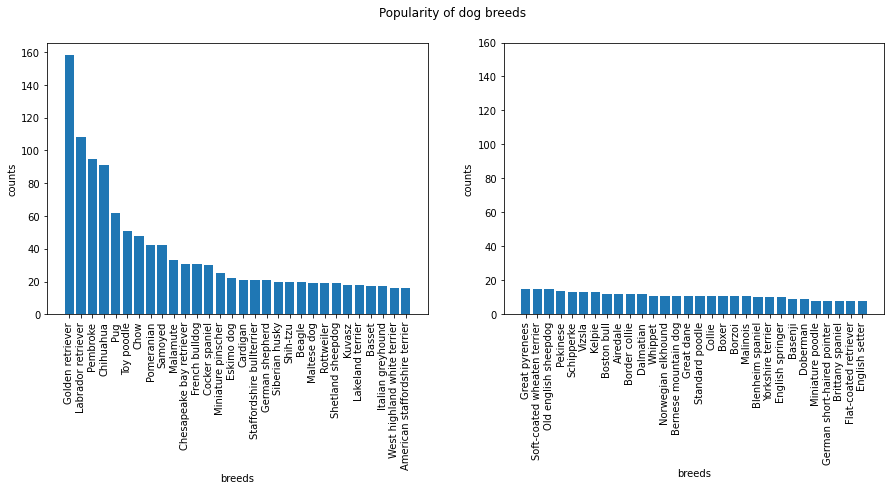

In [101]:
# code for plot
# break table for ease of plotting
x1 = breed.iloc[:30]
x2 = breed.iloc[30:60]
x3 = breed.iloc[60:90]
x4 = breed.iloc[90:]
plt.figure(figsize = [15,5])

#Plot 1
plt.subplot(1,2,1)
plt.bar(data=x1, x='breed', height='counts')
plt.xticks(rotation=90)
plt.xlabel('breeds')
plt.ylabel('counts')

#Plot 2
plt.subplot(1,2,2)
plt.bar(data=x2, x='breed', height='counts')
plt.xticks(rotation=90)
plt.ylim([0,160])
plt.xlabel('breeds')
plt.ylabel('counts')

plt.suptitle('Popularity of dog breeds')
plt.show()

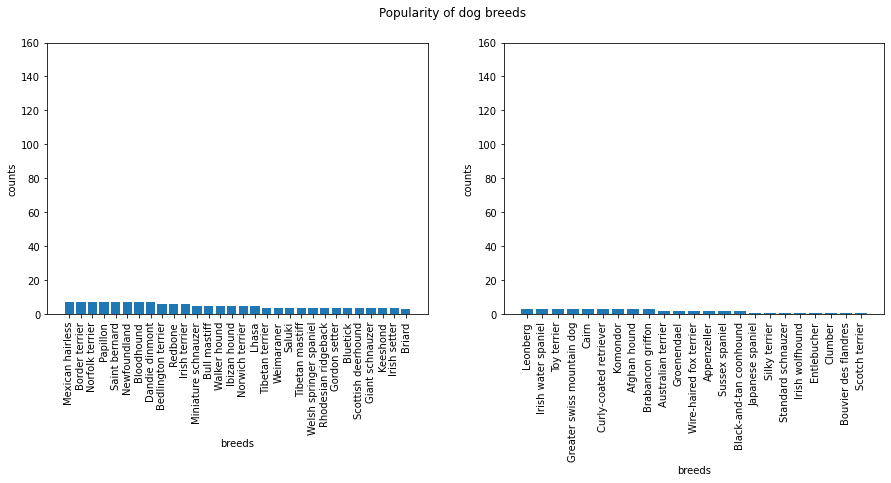

In [102]:
# code for plot
plt.figure(figsize = [15,5])

#Plot 1
plt.subplot(1,2,1)
plt.bar(data=x3, x='breed', height='counts')
plt.xticks(rotation=90)
plt.ylim([0,160])
plt.xlabel('breeds')
plt.ylabel('counts')

#Plot 2
plt.subplot(1,2,2)
plt.bar(data=x4, x='breed', height='counts')
plt.xticks(rotation=90)
plt.ylim([0,160])
plt.xlabel('breeds')
plt.ylabel('counts')

plt.suptitle('Popularity of dog breeds')
plt.show()

The plot shows that **Golden retriever** has the highest count which probably means it is the most common dogs people purchase followed by Labrador retriever, following the order as shown in the bar chart and the least common is the **Scotch terrier**

#### 2) Dog stage for corresponding dog breed

In [103]:
# Making dog stage count a dataframe
do = dog_tweet_df.query('doggo==True').dog_breed.value_counts().rename_axis('breed').reset_index(name='doggo')
fl = dog_tweet_df.query('floofer==True').dog_breed.value_counts().rename_axis('breed').reset_index(name='floofer')
pu = dog_tweet_df.query('pupper==True').dog_breed.value_counts().rename_axis('breed').reset_index(name='pupper')
po = dog_tweet_df.query('puppo==True').dog_breed.value_counts().rename_axis('breed').reset_index(name='puppo')

# merge all dog stages
merge1 =  pd.merge(do,fl, how='left', on='breed')
merge2 =  pd.merge(pu,po, how='left', on='breed')
dog_stage = pd.merge(merge1,merge2,how='right',on='breed').fillna(0)
dog_stage

,breed,doggo,floofer,pupper,puppo
0,Golden retriever,14.0,1.0,20,3.0
1,Pug,0.0,0.0,11,0.0
2,Labrador retriever,6.0,0.0,11,3.0
3,Pembroke,2.0,0.0,10,1.0
4,Toy poodle,0.0,0.0,8,0.0
...,...,...,...,...,...
61,Walker hound,0.0,0.0,1,0.0
62,Norwich terrier,0.0,0.0,1,0.0
63,Rottweiler,0.0,0.0,1,1.0
64,Irish setter,1.0,0.0,1,0.0


In [104]:
dog_stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   breed    66 non-null     object 
 1   doggo    66 non-null     float64
 2   floofer  66 non-null     float64
 3   pupper   66 non-null     int64  
 4   puppo    66 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.1+ KB


In [105]:
# Chage data type to int instead of float
datatype_converter(dog_stage, ['doggo','floofer','puppo'], int)

,doggo,floofer,puppo
0,14,1,3
1,0,0,0
2,6,0,3
3,2,0,1
4,0,0,0
...,...,...,...
61,0,0,0
62,0,0,0
63,0,0,1
64,1,0,0


In [106]:
dog_stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   breed    66 non-null     object
 1   doggo    66 non-null     int32 
 2   floofer  66 non-null     int32 
 3   pupper   66 non-null     int64 
 4   puppo    66 non-null     int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 2.3+ KB


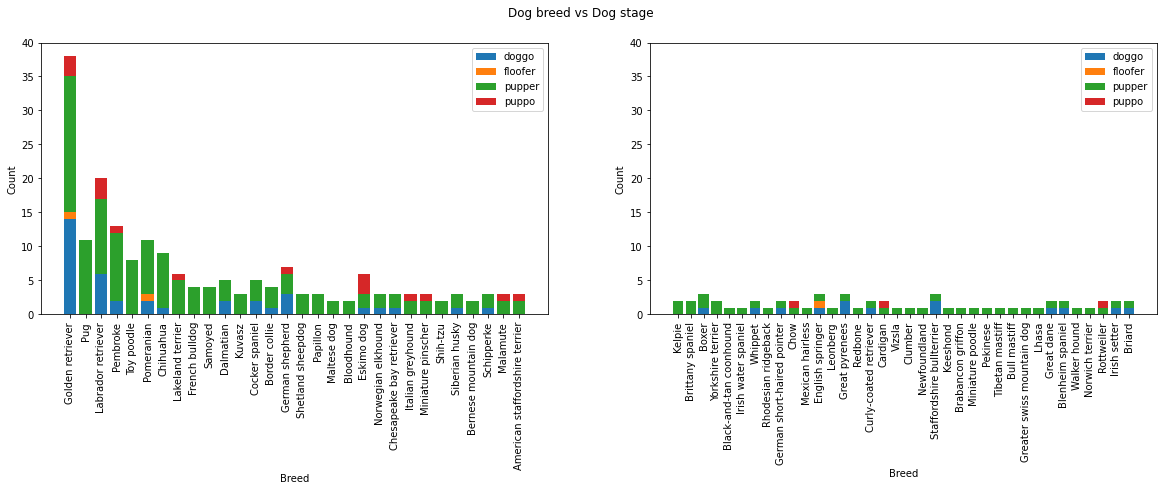

In [107]:
# break for easy plot
dog_stage1=dog_stage.iloc[:30]
dog_stage2=dog_stage.iloc[30:]

x1=dog_stage1['breed']
y1=np.array(dog_stage1['doggo'])
y2=np.array(dog_stage1['floofer'])
y3=np.array(dog_stage1['pupper'])
y4=np.array(dog_stage1['puppo'])

x2=dog_stage2['breed']
y5=np.array(dog_stage2['doggo'])
y6=np.array(dog_stage2['floofer'])
y7=np.array(dog_stage2['pupper'])
y8=np.array(dog_stage2['puppo'])

plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
plt.bar(x1,y1)
plt.bar(x1,y2, bottom=y1)
plt.bar(x1,y3, bottom=y1+y2)
plt.bar(x1, y4, bottom=y1+y2+y3)
plt.xticks(rotation=90)
plt.ylim([0,40])
plt.legend(('doggo','floofer','pupper','puppo'))
plt.xlabel('Breed')
plt.ylabel('Count')


plt.subplot(1,2,2)
plt.bar(x2,y5)
plt.bar(x2,y6, bottom=y5)
plt.bar(x2,y7, bottom=y5+y6)
plt.bar(x2, y8, bottom=y5+y6+y7)
plt.xticks(rotation=90)
plt.ylim([0,40])
plt.legend(('doggo','floofer','pupper','puppo'))
plt.xlabel('Breed')
plt.ylabel('Count')

plt.suptitle('Dog breed vs Dog stage')
plt.show()

For the different breeds the pupper stage seem to be the most popular, few breeds like golden_retriever, pomeranian, and english springer have the floofer stage. 

**3) Which stage has the highest favorite count**

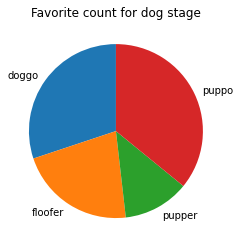

In [108]:
x=['doggo','floofer','pupper','puppo']
a = (dog_tweet_df.query('doggo==True').favorite_count.mean())
b = (dog_tweet_df.query('floofer==True').favorite_count.mean())
c = (dog_tweet_df.query('pupper==True').favorite_count.mean())
d = (dog_tweet_df.query('puppo==True').favorite_count.mean())

y=np.array([a,b,c,d])
plt.pie(y, labels=x, startangle=90)
plt.title('Favorite count for dog stage')
plt.show()

Though most of the dogs are in their pupper stage from the visualization, but the puppo stage has more favorite counts than the pupper stage

#### 4) Which dog breed has the highest numerator rating

Getting numerator ratings for dog_breeds with denominator rating that is equal to 10, muddling up all ratings will not give a true result of the ratings.

In [109]:
# denominator ratings equal to 10
dog_rate = dog_tweet_df.query('rating_denominator == 10').groupby('dog_breed').rating_numerator.mean().sort_values()
dog_rate = dog_rate.rename_axis('breed').reset_index(name='average_rate')

In [119]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         30 non-null     object 
 1   average_rate  30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


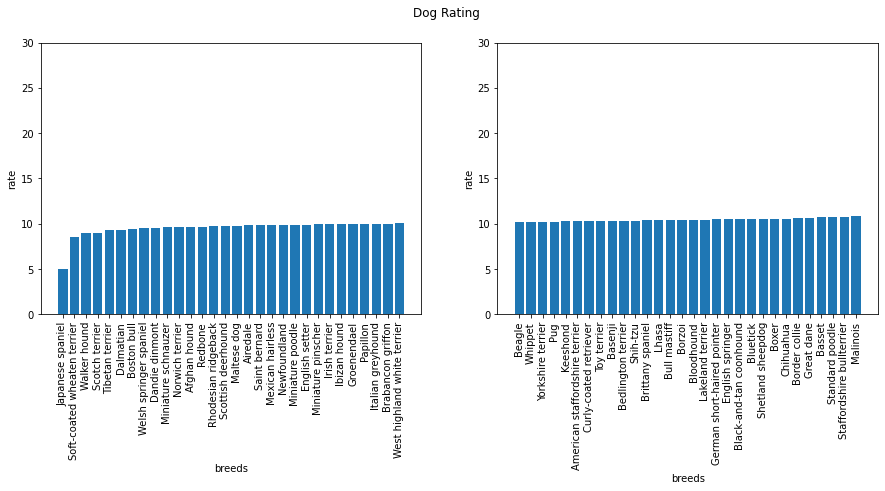

In [110]:
x1 = dog_rate.iloc[:30]
x2 = dog_rate.iloc[30:60]
x3 = dog_rate.iloc[60:90]
x4 = dog_rate.iloc[90:]
plt.figure(figsize = [15,5])

#Plot 1
plt.subplot(1,2,1)
plt.bar(data=x1, x='breed', height='average_rate')
plt.xticks(rotation=90)
plt.xlabel('breeds')
plt.ylabel('rate')
plt.ylim([0,30])

#Plot 2
plt.subplot(1,2,2)
plt.bar(data=x2, x='breed', height='average_rate')
plt.xticks(rotation=90)
plt.xlabel('breeds')
plt.ylabel('rate')
plt.ylim([0,30])


plt.suptitle('Dog Rating')
plt.show()

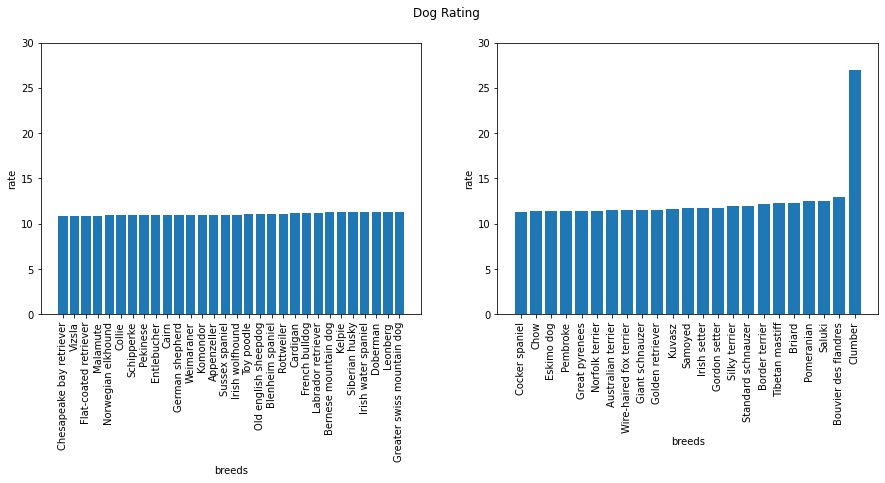

In [111]:
plt.figure(figsize = [15,5])

#Plot 1
plt.subplot(1,2,1)
plt.bar(data=x3, x='breed', height='average_rate')
plt.xticks(rotation=90)
plt.xlabel('breeds')
plt.ylabel('rate')
plt.ylim([0,30])

#Plot 2
plt.subplot(1,2,2)
plt.bar(data=x4, x='breed', height='average_rate')
plt.xticks(rotation=90)
plt.xlabel('breeds')
plt.ylabel('rate')
plt.ylim([0,30])


plt.suptitle('Dog Rating')
plt.show()

Clumber breed has the highest rating and Japanese spaniel has the lowest rating. Though most of them seem to fall in the same range.

Below are breeds that have denominator ratings that are greater than 10. This dating can not exactly tell us about the rating as compared to others since they do not have the same denominator.

In [112]:
# denominator ratings greater than 10
dog_tweet_df.query('rating_denominator >10').groupby('dog_breed').rating_numerator.mean().sort_values()

dog_breed
Great dane                       4.000000
Chihuahua                        7.000000
Borzoi                          45.000000
Siberian husky                  50.000000
Great pyrenees                  60.000000
Golden retriever                83.666667
West highland white terrier     84.000000
Labrador retriever              99.000000
Soft-coated wheaten terrier    100.500000
Chow                           144.000000
Name: rating_numerator, dtype: float64

Joining all denominator rating gives the result below as we can see it is different as compared to when the data was queried by their denominator rating.

In [113]:
dog_rating = dog_tweet_df.groupby('dog_breed').rating_numerator.mean().sort_values()
dog_rating

dog_breed
Japanese spaniel                5.000000
Walker hound                    9.000000
Scotch terrier                  9.000000
Tibetan terrier                 9.250000
Maltese dog                     9.315789
                                 ...    
Chow                           14.166667
Great pyrenees                 14.666667
West highland white terrier    14.687500
Soft-coated wheaten terrier    20.800000
Clumber                        27.000000
Name: rating_numerator, Length: 113, dtype: float64

#### 5) Comparing favorite_count and retweet_count

In [114]:
dog_tweet_df.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator
count,1686.000000,1686.000000,1686.000000,1686.000000
mean,2817.118031,9233.109727,11.473903,10.534401
std,4807.199770,12583.246963,8.106793,6.945891
min,16.000000,81.000000,0.000000,2.000000
25%,649.250000,2163.250000,10.000000,10.000000
50%,1437.500000,4440.000000,11.000000,10.000000
75%,3247.750000,11656.750000,12.000000,10.000000
max,79515.000000,132810.000000,165.000000,150.000000


Favorite count has a mean(average) value of 9233.109727. We would check for favorite count which are above this average value taking it as dogs with high favorite count and those with values below the mean value as those with low favorite count to see how the retweeted count is also affected.

In [115]:
# low favorite count
low = dog_tweet_df.query('favorite_count<9233.109727')
low.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator
count,1160.000000,1160.000000,1160.000000,1160.000000
mean,1081.673276,3331.331897,11.107759,10.723276
std,809.801774,2376.108283,9.301930,8.180775
min,16.000000,81.000000,1.000000,2.000000
25%,470.000000,1403.750000,10.000000,10.000000
50%,917.000000,2889.500000,10.000000,10.000000
75%,1509.250000,4639.250000,12.000000,10.000000
max,4795.000000,9178.000000,165.000000,150.000000


In [116]:
# high favorite count
high = dog_tweet_df.query('favorite_count>9233.109727')
high.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator
count,526.000000,526.000000,526.000000,526.000000
mean,6644.334601,22248.437262,12.281369,10.117871
std,7168.797603,15781.148290,4.354824,2.616683
min,1504.000000,9300.000000,0.000000,10.000000
25%,3261.000000,12462.500000,12.000000,10.000000
50%,4499.000000,17486.000000,12.000000,10.000000
75%,7059.500000,26199.250000,13.000000,10.000000
max,79515.000000,132810.000000,84.000000,70.000000


Dogs with low favorite have low retweet count as compared to dogs which have higher favorite count 

**6) Common names given to dogs**

In [117]:
dog_tweet_df['name'].value_counts().rename_axis('breed').reset_index(name='counts').head(20)

,breed,counts
0,None,419
1,a,46
2,Charlie,10
3,Cooper,10
4,Lucy,10
5,Oliver,9
6,Tucker,9
7,Penny,8
8,Winston,7
9,Daisy,7


Common names given to dogs are Cooper, Lucy and Charlie from the dataset given.

<a id='conclusion'></a>
### Conclusion
> In the first section I examined which breed of dog is commonly owned by people as there are up to 113 breeds in this dataset set and from the visualization it shows that the golden retriever is a very common dog owned by people followed by labrador retriever while the least common is the scotch terrier which might be because of cost or this breed going into extinction this current analysis cannot tell.
>
> In the next part of my analysis I checked for the most common dog stage for each breed and it seems to be that most dogs are in their pupper stage, very few breeds are in their floofer stage though these stages are given by dog owners, it is very possible for a dog in doggo stage to still be called a pupper by their owner. The result got me curious as to which dog stage got more favorite count and from the pie chart it shows that the puppo stage actually has higher counts as compared to pupper.
>
> Next up I checked for the breed that had the highest rating with denominators of 10 only and it shows that clumber has the highest rating. Japanese spaniel which was seen to be the least common also has a very low rating.
>
> Finally, it can be saind that dog tweets with high favorite count also has a corresponding high retweet count.
###### Limitations
> The denominator ratings are not all of value 10
>
> Some dog names are stated as a or none which should not be this is because not all "tweeters" mentioned the names of their dogs